# Udacity (ud170) - Final Project

This is the final project for Udacity' course on 'Intro to Data Analysis'.
(All the copyrights for any of the content-data etc-belongs to the original owner itself, nothing is being reproduced)

## Analysing Titanic Data

Its been more than 107 years since the RMS Titanic sank. More than 1500 people lost their lives. Today, lets check out with a sample data, analyse and predict something! 

In [45]:
# render figures directly in the notebook
%matplotlib inline

# including analytical and visual libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# let seaborn sow its magic
sb.set()

In [19]:
# load data in dataframe
data = pd.read_csv('titanic_data.csv')

Now that we have loaded our data into a dataframe, lets check it out!

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There seems to be some kind of error, as we can see that certain travellers' cabin is not available, so lets remove them.

In [146]:
# passengs whose cabins are known
passengers_with_cabin = data.dropna(axis='index', how='any')
passengers_with_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Lets search for any other problems, and remove if exits.

In [41]:
# lets check for some exceptional ages
print(passengers_with_cabin['Age'].max())
print(passengers_with_cabin['Age'].min())

80.0
0.92


Lets analyse how age, gender etc, effected survival.

In [169]:
# sorting passengers by Age
passengers_with_cabin = passengers_with_cabin.sort_values(by=['Age'])
passengers_with_cabin.index = [int(x) for x in range(len(passengers_with_cabin.index))]

# removing outliers by age
passengers_with_cabin = passengers_with_cabin.iloc[int(0.25*len(passengers_with_cabin.index)):int(0.75*len(passengers_with_cabin.index))]

passengers_with_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
24,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
25,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
26,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
27,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


In [149]:
# group dataframe by passengers who surviveda and didn't survive the tragedy
group_passengers_by_survived = passengers_with_cabin.groupby('Survived', as_index=False)

In [150]:
passengers_by_age = group_passengers_by_survived['Age']
passengers_by_age.get_group(1).head()

47    24.0
48    25.0
49    25.0
52    26.0
53    27.0
Name: Age, dtype: float64

In [151]:
# statistics of passengers who survived
survived_passengers_age = passengers_by_age.get_group(1)
survived_passengers_age.describe()

count    59.000000
mean     34.381356
std       5.346074
min      24.000000
25%      30.500000
50%      35.000000
75%      38.000000
max      47.000000
Name: Age, dtype: float64

In [152]:
# statistics of passengers who didn't survive
non_survived_passengers_age = passengers_by_age.get_group(0)
non_survived_passengers_age.describe()

count    33.000000
mean     36.939394
std       7.850913
min      24.000000
25%      30.000000
50%      37.000000
75%      45.000000
max      47.000000
Name: Age, dtype: float64

We can see that the mean age of passengers who **survived** was **33 years(approx.)**, and the deviation in the age of the survivors was **15 years(approx.).** and the mean age of passengers who **didn't survive** was **41 years(approx.)**, and the deviation in the age of the survivors was **16 years(approx.).**

Hence, we can draw a correlation, that the younger the person was the more likely he/she is to survive. But again our results might just be due to randomization/sampling error.

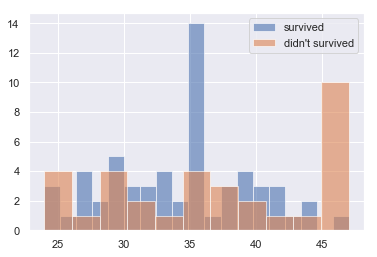

In [167]:
# histogram of age of passengers who survives vs who didn't survive
plt.hist(survived_passengers_age, alpha=0.6, label='survived', bins=int(len(survived_passengers_age)/3))
plt.hist(non_survived_passengers_age, alpha=0.6, label='didn\'t survived', bins=int(len(non_survived_passengers_age)/3))
plt.legend(loc='upper right')

In [154]:
# mean survivors for each age group
mean_surviving_passengers_by_age = passengers_with_cabin.groupby('Age', as_index=False)['Survived'].mean()
mean_surviving_passengers_by_age.head()

,Age,Survived
0,24.0,0.333333
1,25.0,0.500000
2,26.0,1.000000
3,27.0,0.800000
4,28.0,1.000000


### Linear Regression

Using linear regression model for further analysis and prediction.

Linear Regression Model: 

For Sample,
$$ \hat {y} = a + bx $$


For population,
$$
\hat{y}_i = \beta_0 + \beta_1 x_i,
$$

Correlation Coefficient:  -0.3682656564631061


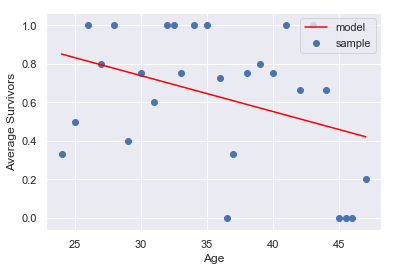

In [155]:
# little bit of linear regression

import scipy as sp

x = mean_surviving_passengers_by_age['Age']
y = mean_surviving_passengers_by_age['Survived']

r, p = sp.stats.pearsonr(x, y)

# linear model y = a + bx
b = r*(y.std()/x.std())
a = y.mean() - (b*x.mean())

plt.scatter(x, y, label='sample')
plt.plot(x, a + b * x, color='red', label='model')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Average Survivors')
print('Correlation Coefficient: ', r)

We get a correlation of -0.37, negative indicating that as age increased the average survivors decreased. Seems like a good value, but again our results might just be due to randomization/sampling error.

For last confirmation lets perform a one direction hypothesis test, with a significance level of 0.05,

**Null Hypothesis:** There is no correlation between age and average survivors.                                       
**Alternate Hypothesis:** The correlation between age and average survivors is negative.

In [168]:
# p_value for one tail t-test
p_value = p*2
print('One tailed p-value: ', p_value)

if p_value < 0.05:
    print('Reject Null')
    
else:
    print('Failed to Reject Null')

One tailed p-value:  0.11750079847534488
Failed to Reject Null


### Conclusion
Since, our **p_value > 0.05**, we do not reject the null. Therefore, we say that **age and number of survivors are not correlated.** 

Well one thing is clear, during that time of chaos, no matter how big or small you were, it didn't effect the chances of your survival.